In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Overview

In [2]:
df = pd.read_csv("../data/clean.csv")
df

,SEX,AGES,ADMISSION MODE,CGPA - 1,CGPA - 2,CLUB / DEPARTMENT,BOARD STUDIED,DAYS SINCE LAST SHOWER,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,CHARACTER,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH,GPL
0,male,19.0,BITSAT,8.85,7.0,NaN,CBSE,12,4,True,False,LITE,20495,5.00,False
1,female,21.0,DASA,7.01,9.0,NaN,ICSE,1,1,True,False,GHOT,2361,0.20,True
2,female,20.0,BITSAT,3.00,8.0,NaN,CBSE,5,4,True,False,GHOT,8548,0.30,True
3,female,21.0,DASA,6.45,7.0,NaN,CBSE,7,4,True,False,GHOT,4086,0.20,True
4,male,21.0,BITSAT,5.65,9.0,NaN,CBSE,7,3,True,False,LITE,13767,8.50,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,male,19.0,BOARD TOPPER,6.02,3.0,NaN,CBSE,6,0,False,False,GHOT,13166,3.90,False
1086,female,24.0,BOARD TOPPER,3.57,6.0,NaN,CBSE,5,2,False,False,GHOT,5619,0.30,True
1087,female,21.0,BITSAT,3.71,5.0,Gaming Club,CBSE,0,4,False,True,LITE,17559,5.40,False
1088,male,22.0,DASA,9.68,5.0,NaN,CBSE,3,3,False,False,GHOT,16411,8.70,False


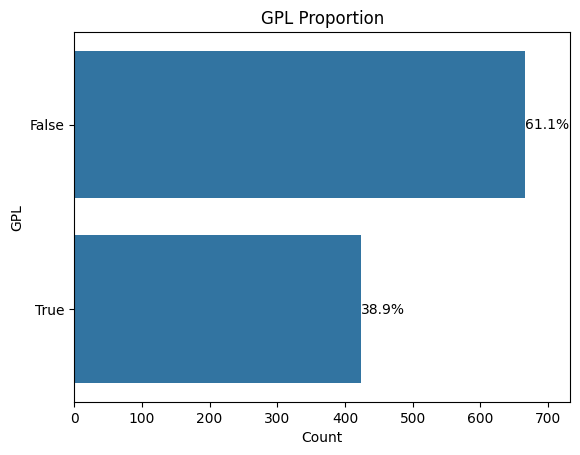

In [3]:
ax = sns.countplot(y='GPL', data=df)

total = df['GPL'].count()

ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')

ax.margins(x=0.1)

ax.set(xlabel='Count', ylabel='GPL', title='GPL Proportion')
plt.show()

### How categorical data affects GPL:

In [4]:
def proportion_graph(x,y):
    (df
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

##### Surprisingly, females are more likely to get GPL

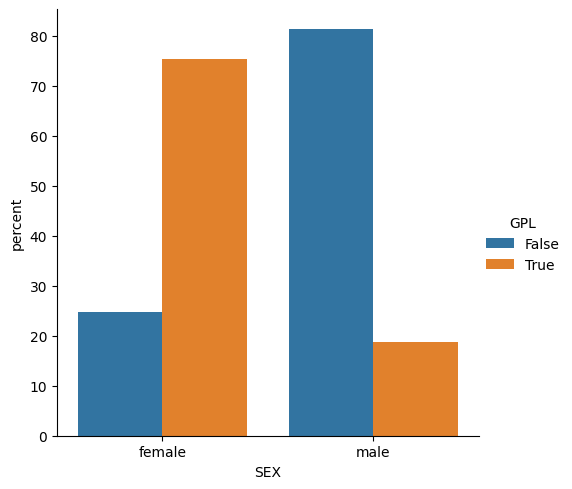

In [5]:
proportion_graph('SEX', 'GPL')

##### DASA people understandably more likely to get GPL

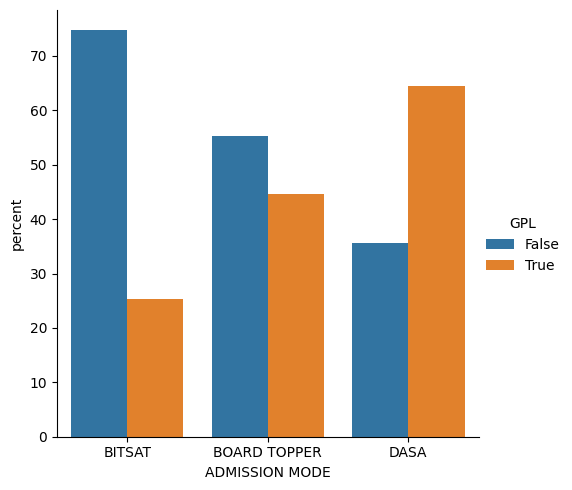

In [6]:
proportion_graph('ADMISSION MODE', 'GPL')

##### ICSE people apparently more likely as well

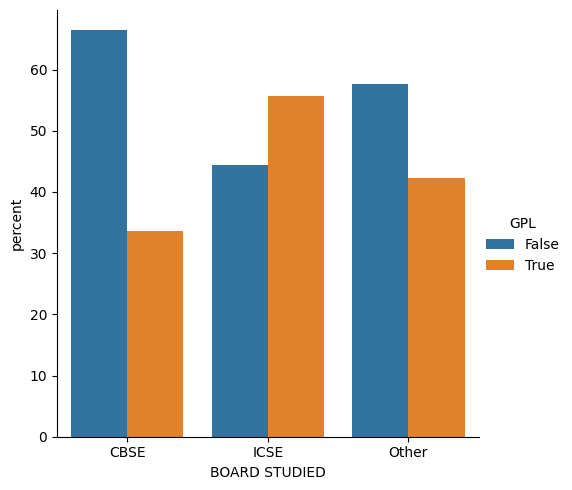

In [7]:
proportion_graph('BOARD STUDIED', 'GPL')

##### Age vs GPL

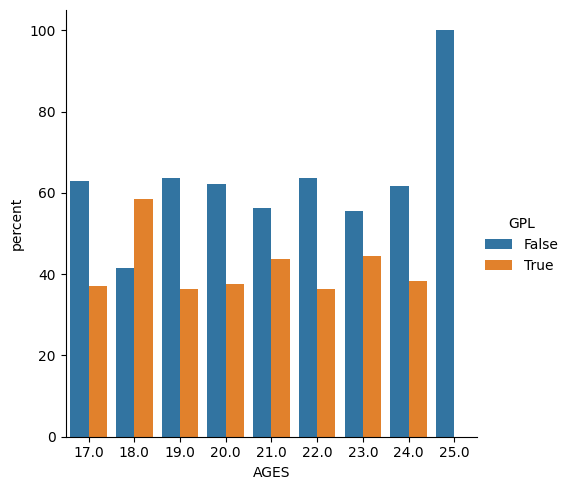

In [8]:
proportion_graph('AGES', 'GPL')

18yr olds get more GPL, understandable since its a milestone birthday


25yr olds don't, there are not many of them and ig they're too old/mature for all this now 🗿

There was one 26yo who DID get a GPL, but that record was removed as it was too much of an outlier

##### DVM ppl more liekly to get GPL ~~(deserved)~~

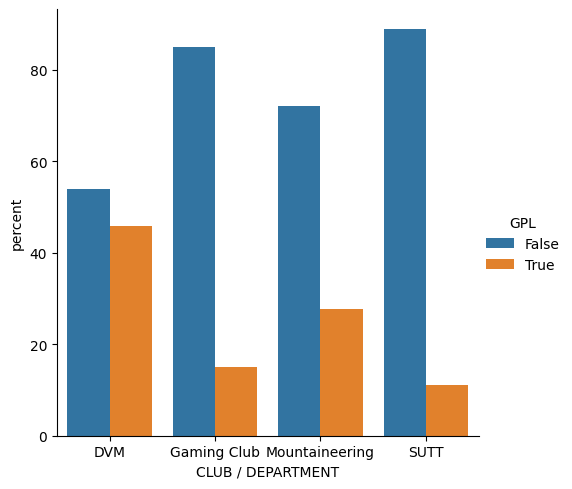

In [9]:
proportion_graph('CLUB / DEPARTMENT', 'GPL')

##### Ghots and lecture attenders more likely to get GPL

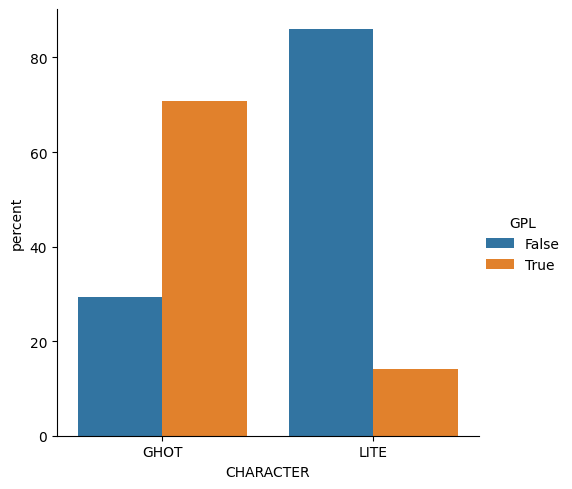

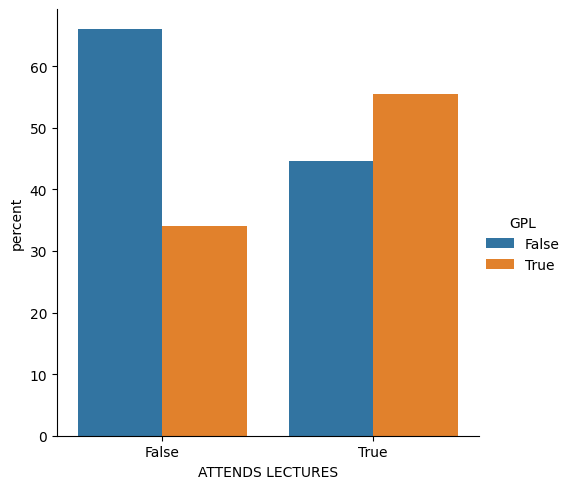

In [10]:
proportion_graph('CHARACTER', 'GPL')
proportion_graph('ATTENDS LECTURES', 'GPL')

##### Having S/O has no effect

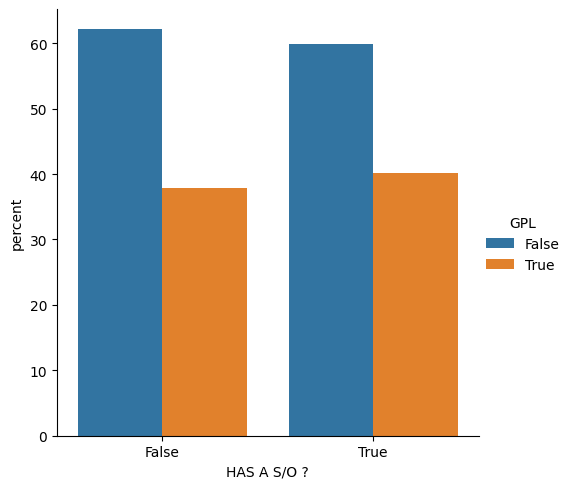

In [11]:
proportion_graph('HAS A S/O ?', 'GPL')

### How numeric data affects GPL:

##### Grams per month has a striking distribution, and a strong correlation with GPL

<Axes: xlabel='GPL', ylabel='GRAMS / MONTH'>

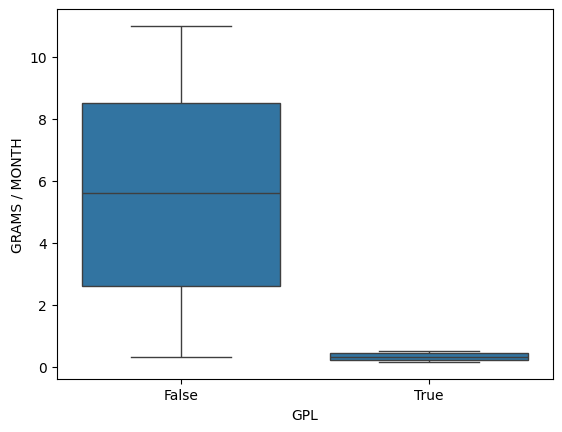

In [12]:
sns.boxplot(data=df, x='GPL', y='GRAMS / MONTH')

##### Pizzeria expenditure looks like a very strong factor

<Axes: xlabel='GPL', ylabel='PIZZERIA EXPENDITURE (annual)'>

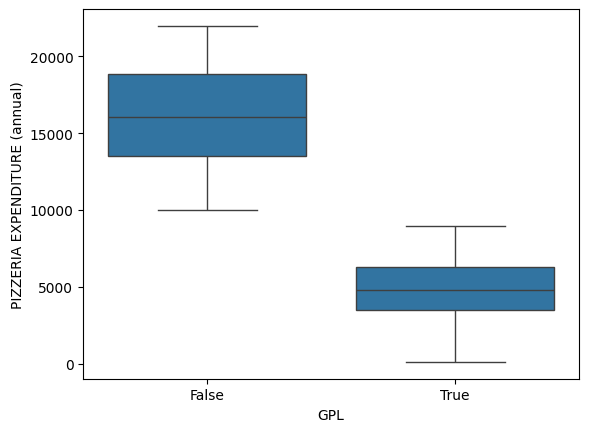

In [13]:
sns.boxplot(data=df, x='GPL', y='PIZZERIA EXPENDITURE (annual)')

##### Treats given seems like a good factor too

<Axes: xlabel='GPL', ylabel='TREATS GIVEN'>

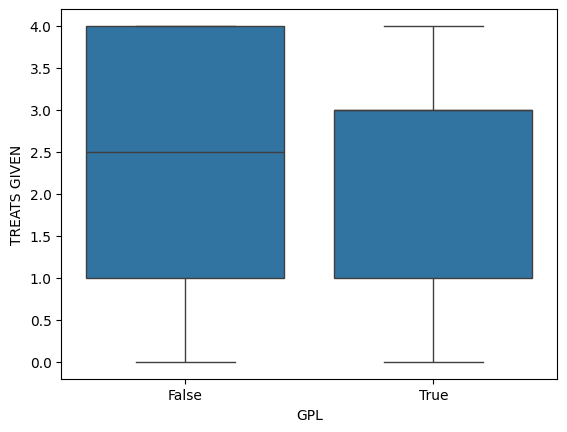

In [14]:
sns.boxplot(data=df, x='GPL', y='TREATS GIVEN')

##### Unimportant factors:

<Axes: xlabel='GPL', ylabel='DAYS SINCE LAST SHOWER'>

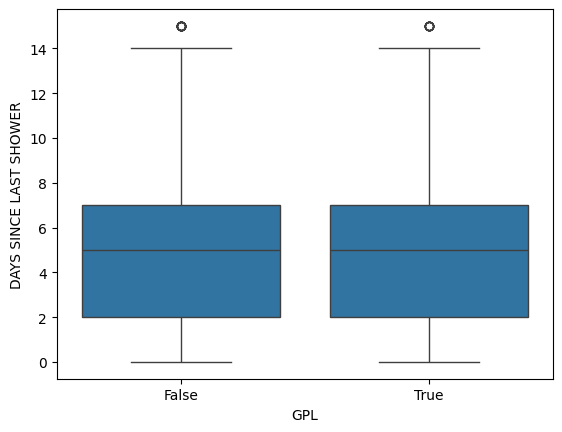

In [15]:

sns.boxplot(data=df, x='GPL', y='DAYS SINCE LAST SHOWER')

<Axes: xlabel='GPL', ylabel='AGES'>

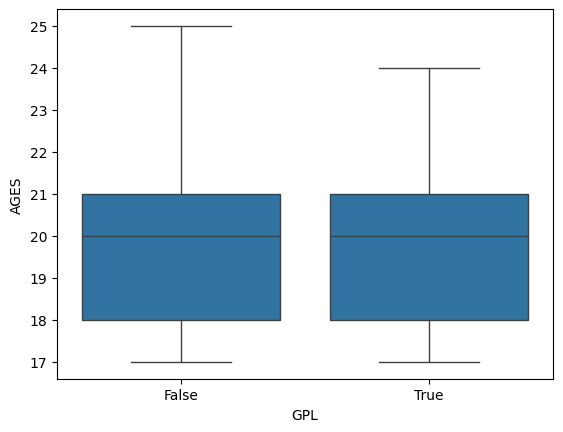

In [16]:
sns.boxplot(data=df, x='GPL', y='AGES')

<Axes: xlabel='GPL', ylabel='CGPA - 1'>

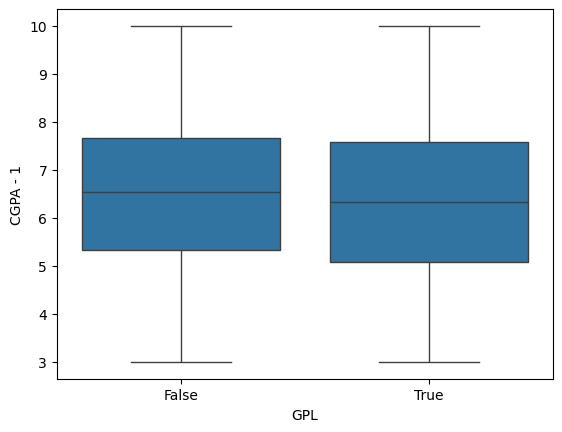

In [17]:
sns.boxplot(data=df, x='GPL', y='CGPA - 1')

<Axes: xlabel='GPL', ylabel='CGPA - 2'>

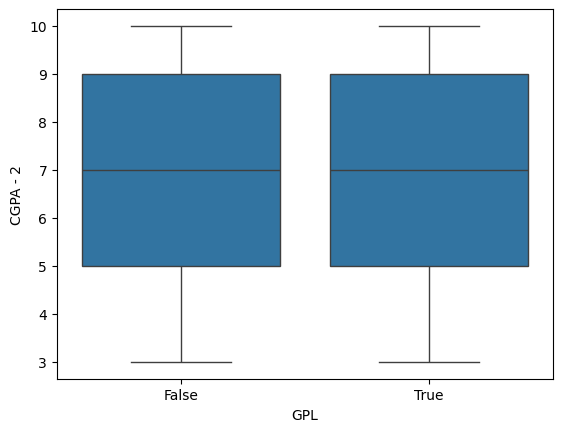

In [18]:
sns.boxplot(data=df, x='GPL', y='CGPA - 2')